# Simply viewing gif images of DES data

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

import subprocess as sp
import glob
import pandas as pd

In [26]:
! ls /global/project/projectdirs/dasrepo/vpa/supernova_cnn/data/raw_data/home2/SNWG/Archive/2013/Y1/20130829/470430504/

diff6962257.fits  diff6962486.gif   srch6962481.fits  temp6962468.gif
diff6962257.gif   diff6962490.fits  srch6962481.gif   temp6962470.fits
diff6962258.fits  diff6962490.gif   srch6962482.fits  temp6962470.gif
diff6962258.gif   diff6962491.fits  srch6962482.gif   temp6962472.fits
diff6962260.fits  diff6962491.gif   srch6962483.fits  temp6962472.gif
diff6962260.gif   diff6962493.fits  srch6962483.gif   temp6962476.fits
diff6962262.fits  diff6962493.gif   srch6962485.fits  temp6962476.gif
diff6962262.gif   diff6962495.fits  srch6962485.gif   temp6962480.fits
diff6962467.fits  diff6962495.gif   srch6962486.fits  temp6962480.gif
diff6962467.gif   srch6962257.fits  srch6962486.gif   temp6962481.fits
diff6962468.fits  srch6962257.gif   srch6962490.fits  temp6962481.gif
diff6962468.gif   srch6962258.fits  srch6962490.gif   temp6962482.fits
diff6962470.fits  srch6962258.gif   srch6962491.fits  temp6962482.gif
diff6962470.gif   srch6962260.fits  srch6962491.gif   temp6962483.fits
diff6962472.f

### Plot specific file

[[255 102  94 ... 134 141 255]
 [ 99 255 150 ... 131 255  74]
 [ 75 131 255 ... 255  60  99]
 ...
 [139 110 255 ... 255  82 105]
 [ 90 255 155 ...  92 255  62]
 [255 131  85 ...  84 138 255]]


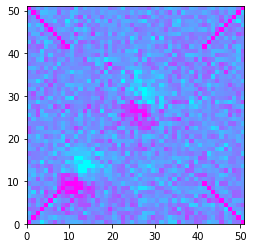

In [36]:
### Read file and create list ###
fname='/global/project/projectdirs/dasrepo/vpa/supernova_cnn/data/raw_data/home2/SNWG/Archive/2013/Y1/20130829/470430504/diff6962485.gif'
img=plt.imread(fname)
print(img)

### Plot ###
plt.figure()
plt.imshow(img,origin='lower',interpolation='nearest',cmap='cool', extent = [0,51,0,51])
plt.show()

### Plot grid of files

In [37]:
dir_name='/global/project/projectdirs/dasrepo/vpa/supernova_cnn/data/raw_data/home2/SNWG/Archive/2013/Y1/20130829/470430504/'

In [54]:
file_list1=glob.glob(dir_name+'/temp*.gif')
# file_list1=glob.glob(dir_name+'/srch*.gif')
# file_list1=glob.glob(dir_name+'/diff*.gif')

img_lst=[plt.imread(fle) for fle in file_list1]
len(img_lst)

19

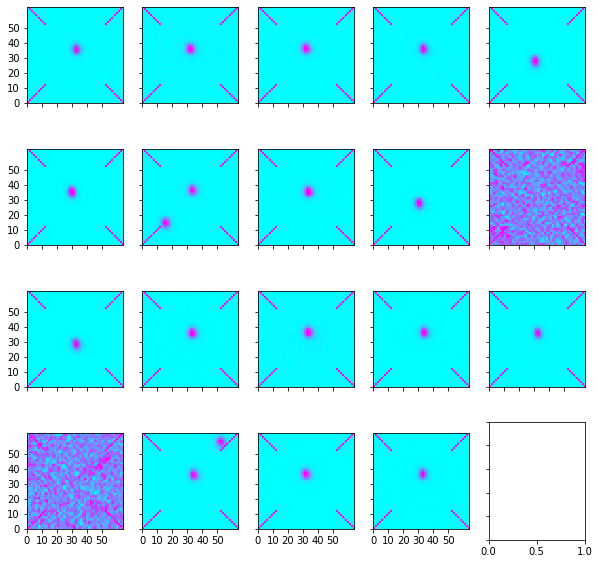

In [55]:
arr=img_lst[:]
size=len(arr)
cols=5
rows=int(np.ceil(size/cols))

# rows,cols=10,7
assert( len(arr)< rows*cols), "more rows and columns needed"
fig,axarr=plt.subplots(rows,cols,figsize=(10,10))
for i in range(rows*cols):
    if i>=len(arr): break
    row,col=int(i/cols),i%cols
#     print(i,'\t',row,col)
#             axarr[row,col].imshow(arr[i],origin='lower',alpha=0.1)
    axarr[row,col].imshow(img_lst[i],origin='lower',interpolation='nearest',cmap='cool', extent = [0, 64, 0, 64])

    axarr[row,col].set_xticks(np.arange(0,51,10))
    axarr[row,col].set_yticks(np.arange(0,51,10))

#     fig.subplots_adjust(hspace=0.0)
# Drop axis labels
temp=plt.setp([a.get_xticklabels() for a in axarr[:-1,:].flatten()], visible=False)
temp=plt.setp([a.get_yticklabels() for a in axarr[:,1:].flatten()], visible=False)



### Read features

In [22]:
fname='/global/project/projectdirs/dasrepo/vpa/supernova_cnn/data/raw_data/autoscan_features.3.csv'
df1=pd.read_csv(fname,sep=',',comment='#')

In [28]:
df1.shape,df1.columns

((898963, 40),
 Index(['ID', 'OBJECT_TYPE', 'AMP', 'A_IMAGE', 'A_REF', 'BAND', 'B_IMAGE',
        'B_REF', 'CCDID', 'COLMEDS', 'DIFFSUMRN', 'ELLIPTICITY', 'FLAGS',
        'FLUX_RATIO', 'GAUSS', 'GFLUX', 'L1', 'LACOSMIC', 'MAG', 'MAGDIFF',
        'MAGLIM', 'MAG_FROM_LIMIT', 'MAG_REF', 'MAG_REF_ERR', 'MASKFRAC',
        'MIN_DISTANCE_TO_EDGE_IN_NEW', 'N2SIG3', 'N2SIG3SHIFT', 'N2SIG5',
        'N2SIG5SHIFT', 'N3SIG3', 'N3SIG3SHIFT', 'N3SIG5', 'N3SIG5SHIFT',
        'NN_DIST_RENORM', 'NUMNEGRN', 'SCALE', 'SNR', 'SPREADERR_MODEL',
        'SPREAD_MODEL'],
       dtype='object'))

In [29]:
df1.head(15)

,ID,OBJECT_TYPE,AMP,A_IMAGE,A_REF,BAND,B_IMAGE,B_REF,CCDID,COLMEDS,...,N3SIG3,N3SIG3SHIFT,N3SIG5,N3SIG5SHIFT,NN_DIST_RENORM,NUMNEGRN,SCALE,SNR,SPREADERR_MODEL,SPREAD_MODEL
0,10742010,0,0.808323,1.508,2.650069,i,0.950,1.899501,10,0.112077,...,0,-8,0,-9,0.674934,22,2.024122,7.722346,0.004629,-0.003718
1,8828139,0,0.975141,1.430,NaN,i,1.319,NaN,10,0.072256,...,0,5,0,5,NaN,21,1.379283,25.582918,0.002420,-0.000578
2,8229889,0,0.877440,0.505,NaN,z,0.494,NaN,57,0.106124,...,0,1,0,1,NaN,20,0.950069,3.914192,0.008863,-0.020044
3,11033218,0,0.681179,0.762,3.008957,i,0.449,2.855881,1,0.139071,...,0,-14,2,-27,1.240574,18,1.749488,5.068382,0.008041,0.000246
4,8341858,0,0.645906,1.205,1.352224,i,0.982,1.063333,30,0.123302,...,0,4,0,4,2.970234,16,1.930613,7.372579,0.005606,0.001771
5,11390373,0,0.880991,0.507,3.491957,z,0.493,1.937422,35,0.093365,...,0,-7,0,-13,1.203752,20,1.242116,3.720927,0.007562,-0.010430
6,8254667,0,0.614399,0.801,NaN,i,0.796,NaN,41,0.114574,...,0,1,0,2,NaN,21,1.363280,6.066898,0.006803,-0.005811
7,7822720,0,0.600540,0.942,NaN,z,0.691,NaN,50,0.080520,...,0,2,0,2,NaN,20,1.723274,5.795419,0.005999,-0.003558
8,9375149,0,0.331429,1.763,3.391478,g,1.060,2.573367,27,0.128049,...,0,-20,0,-32,0.205377,4,4.311777,9.184166,0.003902,0.000555
9,7877396,0,0.975283,2.054,1.295175,z,1.910,0.926131,5,0.022339,...,0,15,0,16,3.299159,5,1.740996,42.839336,0.000826,-0.000465
